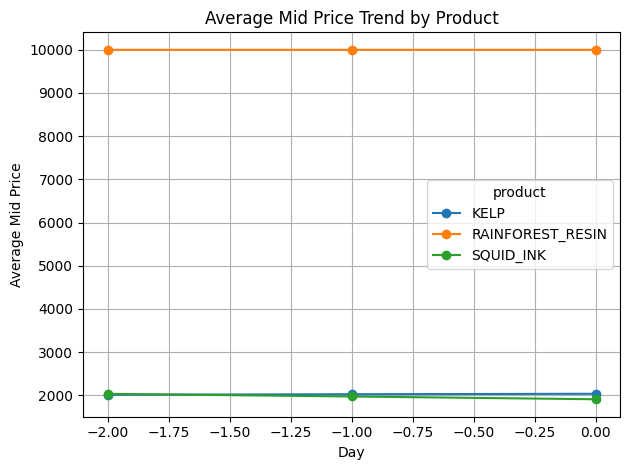

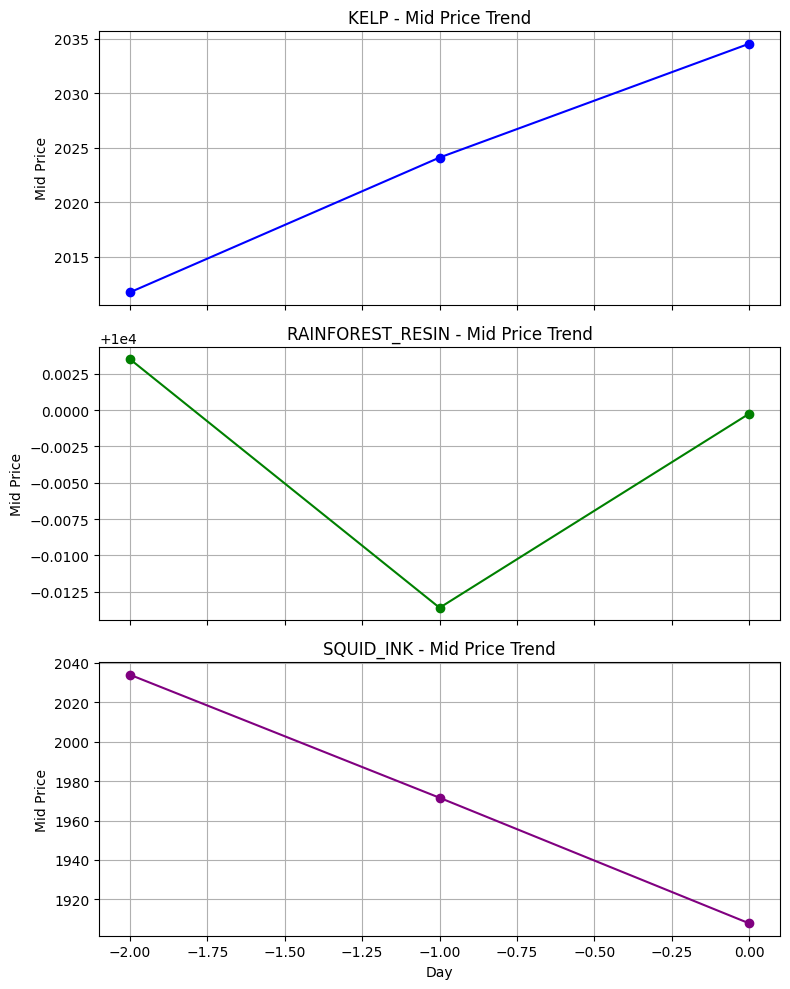

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load all the uploaded CSV files
prices_day_minus_2 = pd.read_csv("data/prices_round_1_day_-2.csv")
prices_day_minus_1 = pd.read_csv("data/prices_round_1_day_-1.csv")
prices_day_0 = pd.read_csv("data/prices_round_1_day_0.csv")

trades_day_minus_2 = pd.read_csv("data/trades_round_1_day_-2.csv")
trades_day_minus_1 = pd.read_csv("data/trades_round_1_day_-1.csv")
trades_day_0 = pd.read_csv("data/trades_round_1_day_0.csv")


# Convert the CSVs using proper delimiters since they are semicolon-separated
prices_day_minus_2 = pd.read_csv("data/prices_round_1_day_-2.csv", sep=";")
prices_day_minus_1 = pd.read_csv("data/prices_round_1_day_-1.csv", sep=";")
prices_day_0 = pd.read_csv("data/prices_round_1_day_0.csv", sep=";")

trades_day_minus_2 = pd.read_csv("data/trades_round_1_day_-2.csv", sep=";")
trades_day_minus_1 = pd.read_csv("data/trades_round_1_day_-1.csv", sep=";")
trades_day_0 = pd.read_csv("data/trades_round_1_day_0.csv", sep=";")

# Combine price data for trend analysis
prices_combined = pd.concat([
    prices_day_minus_2.assign(day=-2),
    prices_day_minus_1.assign(day=-1),
    prices_day_0.assign(day=0)
], ignore_index=True)

# Focus on mid_price trends by product
avg_mid_prices = prices_combined.groupby(["day", "product"])["mid_price"].mean().unstack()


avg_mid_prices.plot(marker='o', title="Average Mid Price Trend by Product")
plt.xlabel("Day")
plt.ylabel("Average Mid Price")
plt.grid(True)
plt.tight_layout()
plt.show()


# Extract mid price trend for each product separately
kelp_prices = prices_combined[prices_combined["product"] == "KELP"].groupby("day")["mid_price"].mean()
resin_prices = prices_combined[prices_combined["product"] == "RAINFOREST_RESIN"].groupby("day")["mid_price"].mean()
squid_prices = prices_combined[prices_combined["product"] == "SQUID_INK"].groupby("day")["mid_price"].mean()

# Plot individual trends
fig, axs = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

kelp_prices.plot(ax=axs[0], marker='o', color='blue', title="KELP - Mid Price Trend")
axs[0].set_ylabel("Mid Price")
axs[0].grid(True)

resin_prices.plot(ax=axs[1], marker='o', color='green', title="RAINFOREST_RESIN - Mid Price Trend")
axs[1].set_ylabel("Mid Price")
axs[1].grid(True)

squid_prices.plot(ax=axs[2], marker='o', color='purple', title="SQUID_INK - Mid Price Trend")
axs[2].set_xlabel("Day")
axs[2].set_ylabel("Mid Price")
axs[2].grid(True)

plt.tight_layout()
plt.show()